In [1]:
%load_ext autoreload
%autoreload 2

Using DESY6 fid n(z), which has 6 redshift bins
[bin_z: 3, z_avg: 0.938, integral of n(z) (target: 0.99): 0.99185, z_range: (0.308, 1.605)]


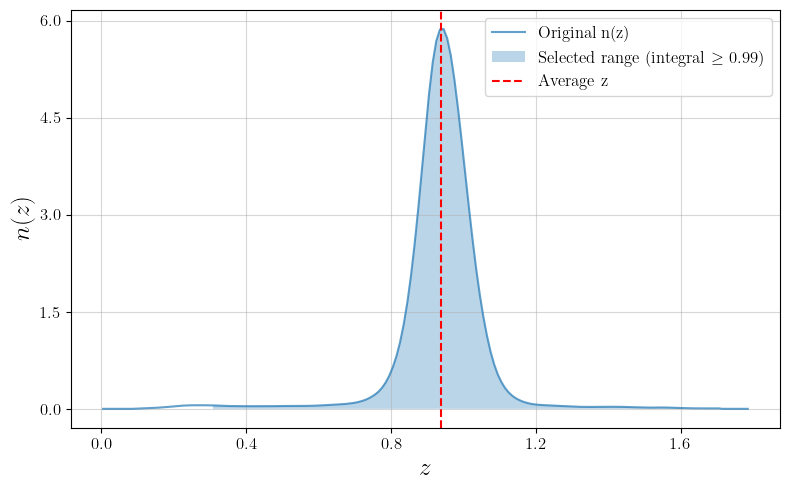

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
from utils_data import RedshiftDistributions

bin_z = 3
target_area = 0.99

redshift_distributions = RedshiftDistributions(dataset='DESY6', nz_flag='fid', verbose=True)
z_values = redshift_distributions.z_values(bin_z=bin_z, Nz=10**3, target_area=target_area, verbose=True)
nz_values = redshift_distributions.nz_interp(z_values, bin_z=bin_z)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(redshift_distributions.nz_data[:, 0], 
        redshift_distributions.nz_data[:, bin_z+1], 
        label='Original n(z)', 
        alpha=0.7)
ax.fill_between(z_values, nz_values, alpha=0.3, label=f'Selected range (integral $\geq$ {target_area})')
ax.axvline(redshift_distributions.z_average(bin_z=bin_z), 
           color='red', linestyle='--', label='Average z')
ax.set_xlabel(r'$z$', fontsize=18)
ax.set_ylabel(r'$n(z)$', fontsize=18)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.tick_params(axis="both", which="major", labelsize=12)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.5)
plt.tight_layout()
